In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow.parquet as pq
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

In [2]:
train = pq.read_pandas('/Users/sshubam/Desktop/fsm_project/train.parquet').to_pandas()

## Data Description
Faults in electric transmission lines can lead to a destructive phenomenon called partial discharge. If left alone, partial discharges can damage equipment to the point that it stops functioning entirely. Your challenge is to detect partial discharges so that repairs can be made before any lasting harm occurs.

Each signal contains 800,000 measurements of a power line's voltage, taken over 20 milliseconds. As the underlying electric grid operates at 50 Hz, this means each signal covers a single complete grid cycle. The grid itself operates on a 3-phase power scheme, and all three phases are measured simultaneously.

## File Descriptions
* metadata_[train/test].csv

    * id_measurement: the ID code for a trio of signals recorded at the same time.
    * signal_id: the foreign key for the signal data. Each signal ID is unique across both train and test, so the first ID in train is '0' but the first ID in test is '8712'.
    * phase: the phase ID code within the signal trio. The phases may or may not all be impacted by a fault on the line.
    * target: 0 if the power line is undamaged, 1 if there is a fault.
* [train/test].parquet - The signal data. Each column contains one signal; 800,000 int8 measurements as exported with pyarrow.parquet version 0.11. Please note that this is different than our usual data orientation of one row per observation; the switch makes it possible loading a subset of the signals efficiently. If you haven't worked with Apache Parquet before, please refer to either the Python data loading starter kernel.

* sample_submission.csv: a valid sample submission.

In [3]:
train

,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,18,1,-19,-16,-5,19,-15,15,-1,-16,...,18,-22,12,8,13,6,-21,-15,-9,20
1,18,0,-19,-17,-6,19,-17,16,0,-15,...,17,-21,12,8,14,7,-19,-15,-8,21
2,17,-1,-20,-17,-6,19,-17,15,-3,-15,...,16,-21,13,8,15,8,-18,-14,-8,22
3,18,1,-19,-16,-5,20,-16,16,0,-15,...,16,-21,12,8,15,8,-19,-14,-7,23
4,18,0,-19,-16,-5,20,-17,16,-2,-14,...,17,-22,12,8,15,8,-18,-14,-8,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,19,2,-18,-15,-4,21,-16,16,-1,-17,...,18,-20,12,9,14,6,-20,-14,-7,22
799996,19,1,-19,-15,-4,20,-17,15,-3,-18,...,18,-20,13,9,14,6,-20,-13,-7,23
799997,17,0,-19,-15,-4,21,-16,14,-2,-18,...,18,-20,13,9,13,6,-20,-14,-7,23
799998,19,1,-18,-14,-3,22,-16,17,-1,-17,...,19,-19,13,10,14,6,-20,-14,-8,22


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 8712 entries, 0 to 8711
dtypes: int8(8712)
memory usage: 6.5 GB


In [2]:
import pandas as pd
train_csv = pd.read_csv("/Users/sshubam/Desktop/fsm_project/Dataset/metadata_train.csv")
train_csv

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1
...,...,...,...,...
8707,8707,2902,1,0
8708,8708,2902,2,0
8709,8709,2903,0,0
8710,8710,2903,1,0


In [3]:
import pandas as pd
test_csv = pd.read_csv("/Users/sshubam/Desktop/fsm_project/Dataset/metadata_test.csv")
test_csv

,signal_id,id_measurement,phase
0,8712,2904,0
1,8713,2904,1
2,8714,2904,2
3,8715,2905,0
4,8716,2905,1
...,...,...,...
20332,29044,9681,1
20333,29045,9681,2
20334,29046,9682,0
20335,29047,9682,1


Partial discharge (PD) is a localized electrical discharge that only partially bridges the insulation between conductors and which may or may not occur adjacent to a conductor. PD occurs whenever there is a stressed region due to some impurity/cavity inside the insulation or when there is a protrusion outside it.


<AxesSubplot:xlabel='target', ylabel='count'>

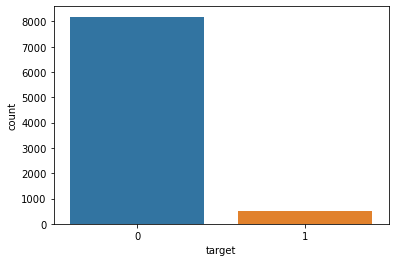

In [6]:
fig=figure(facecolor='white')
sns.countplot(x="target", data=train_csv)
# target: 0 if the power line is undamaged, 1 if there is a fault.

From the above plot, we can observe that we have less damaged signal data then undamaged signal data

<AxesSubplot:xlabel='target', ylabel='count'>

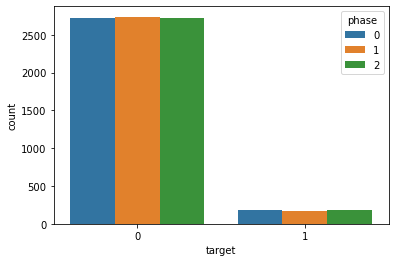

In [8]:
fig=figure(facecolor='white')
sns.countplot(x="target", data=train_csv, hue="phase")

It can be observed that we have full data of al the 3 phases for each signal

In [9]:
train_data = pq.read_pandas('train.parquet').to_pandas()

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 8712 entries, 0 to 8711
dtypes: int8(8712)
memory usage: 6.5 GB


In [14]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,18,1,-19,-16,-5,19,-15,15,-1,-16,...,18,-22,12,8,13,6,-21,-15,-9,20
1,18,0,-19,-17,-6,19,-17,16,0,-15,...,17,-21,12,8,14,7,-19,-15,-8,21
2,17,-1,-20,-17,-6,19,-17,15,-3,-15,...,16,-21,13,8,15,8,-18,-14,-8,22
3,18,1,-19,-16,-5,20,-16,16,0,-15,...,16,-21,12,8,15,8,-19,-14,-7,23
4,18,0,-19,-16,-5,20,-17,16,-2,-14,...,17,-22,12,8,15,8,-18,-14,-8,23


In [18]:
train_data = train_data.T

In [20]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,799990,799991,799992,799993,799994,799995,799996,799997,799998,799999
0,18,18,17,18,18,18,19,18,18,17,...,18,18,17,17,18,19,19,17,19,17
1,1,0,-1,1,0,0,1,0,0,0,...,1,0,0,0,0,2,1,0,1,0
2,-19,-19,-20,-19,-19,-20,-18,-19,-20,-19,...,-19,-20,-21,-18,-19,-18,-19,-19,-18,-19
3,-16,-17,-17,-16,-16,-15,-16,-17,-18,-17,...,-15,-15,-15,-15,-15,-15,-15,-15,-14,-14
4,-5,-6,-6,-5,-5,-4,-5,-7,-7,-7,...,-4,-4,-4,-5,-4,-4,-4,-4,-3,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8707,6,7,8,8,8,8,8,6,6,6,...,6,5,5,5,6,6,6,6,6,6
8708,-21,-19,-18,-19,-18,-19,-19,-20,-21,-21,...,-21,-20,-21,-21,-20,-20,-20,-20,-20,-19
8709,-15,-15,-14,-14,-14,-14,-14,-14,-14,-14,...,-13,-13,-14,-14,-14,-14,-13,-14,-14,-15
8710,-9,-8,-8,-7,-8,-8,-8,-8,-8,-8,...,-6,-7,-7,-7,-7,-7,-7,-7,-8,-8


In [21]:
print("train shape is {}".format(train_data.shape))

train shape is (8712, 800000)


In [23]:
neg_index = train_csv.query("target == 0 & phase == 0").head(9).index.values
pos_index = train_csv.query("target == 1 & phase == 0").head(9).index.values

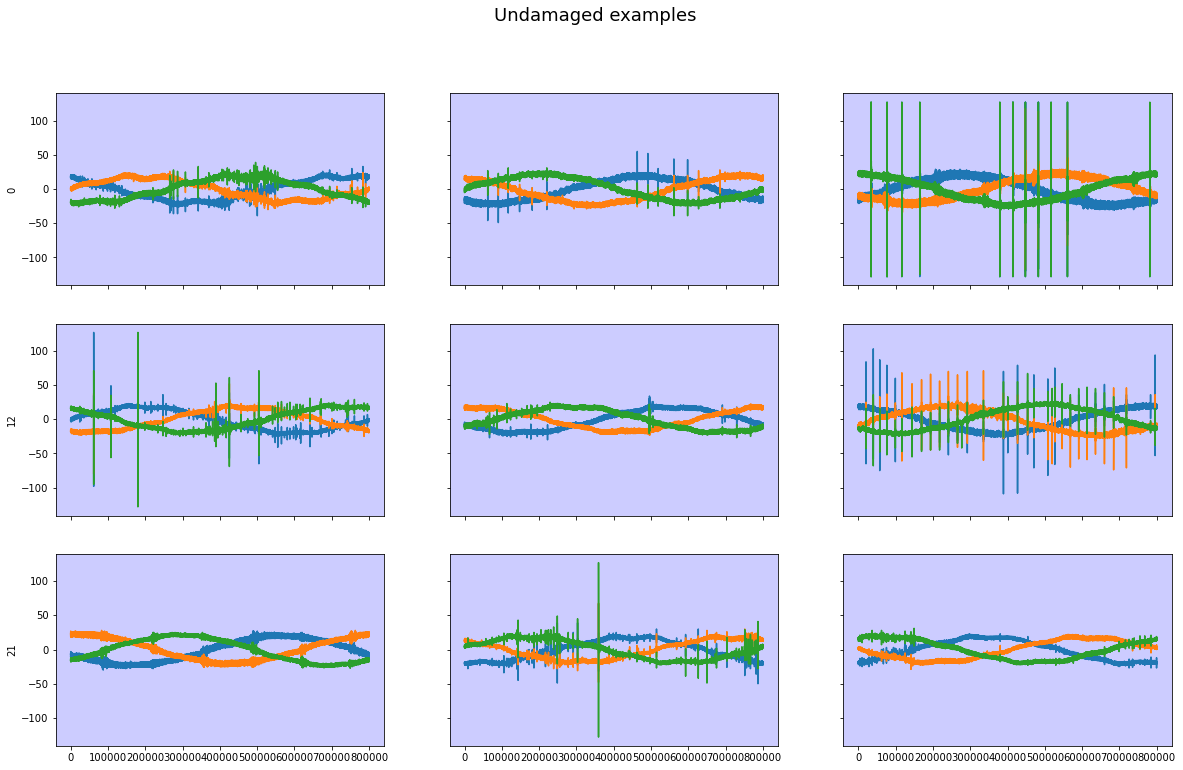

In [28]:
fig, axes = plt.subplots(3, 3, figsize = (20, 12), sharex = True, sharey = True, facecolor = "white")
fig.suptitle("Undamaged examples", size = 18)
for x, index in enumerate(neg_index):
    for phase in range(3):
        sns.lineplot(x = train_data.columns, y = t rain_data.iloc[index+phase, :], ax = axes[x//3, x%3])
    axes[x//3, x%3].patch.set_facecolor('blue')
    axes[x//3, x%3].patch.set_alpha(0.2)

From the above plot of the undamaged signals, we can observe that there is some noise in our signal data which can severely affect the performance of our model, so we need to apply some signal filtering preprocessing to remove the noise. 

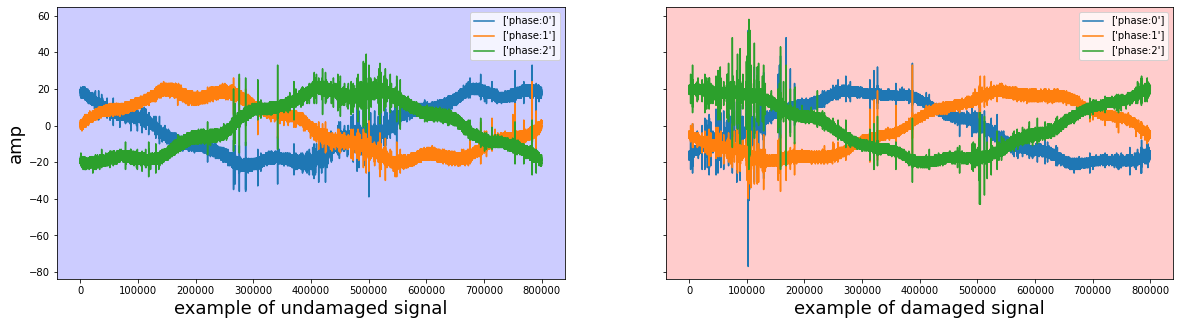

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5), sharey = True, facecolor = "white")
for i in range(3):
    sns.lineplot(x = train_data.columns, y = train_data.iloc[i, :], ax = ax1, label = ["phase:"+str(train_csv.iloc[i, :].phase)])
ax1.set_xlabel("example of undamaged signal", fontsize = 18)
ax1.set_ylabel("amp", fontsize = 18)
ax1.patch.set_facecolor('blue')
ax1.patch.set_alpha(0.2)
for i in range(3, 6):
    sns.lineplot(x = train_data.columns, y = train_data.iloc[i, :], ax = ax2, label = ["phase:"+str(train_csv.iloc[i, :].phase)])
ax2.set_xlabel("example of damaged signal", fontsize = 18)
ax2.set_ylabel("amp", fontsize = 18)
ax2.patch.set_facecolor('red')
ax2.patch.set_alpha(0.2)

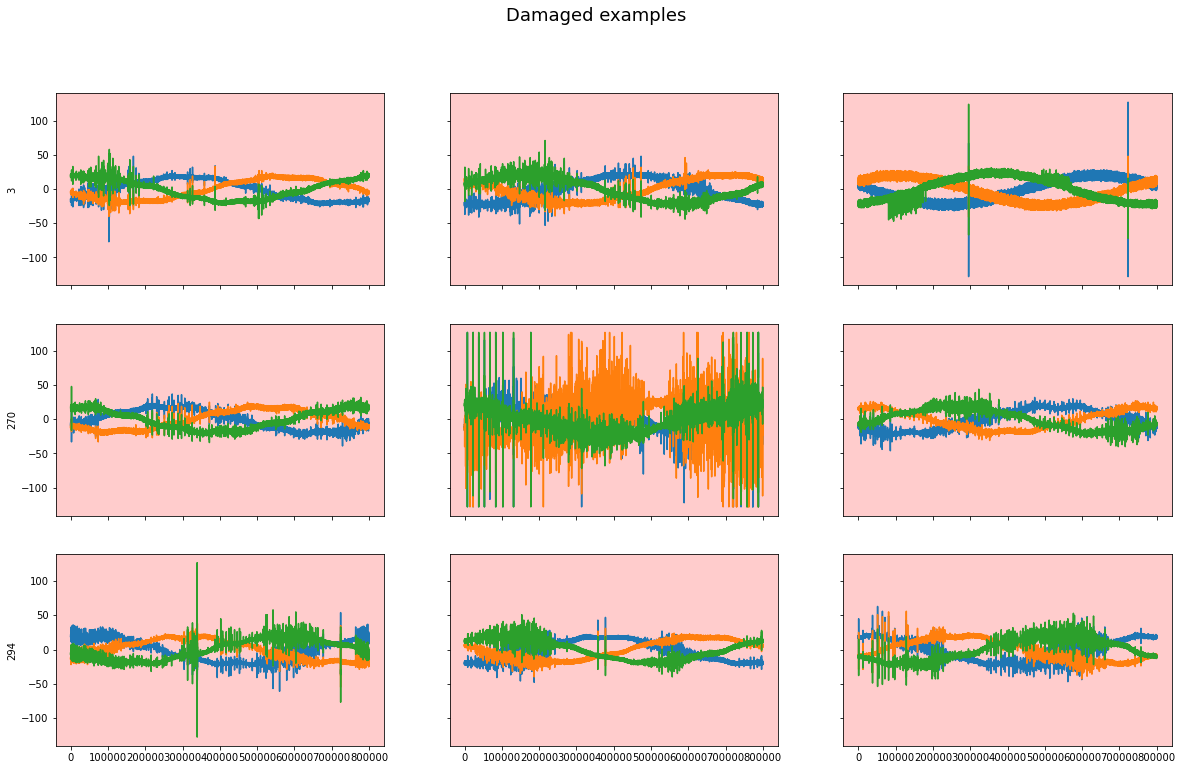

In [37]:
fig, axes = plt.subplots(3, 3, figsize = (20, 12), sharex = True, sharey = True, facecolor = "white")
fig.suptitle("Damaged examples", size = 18)
for x, index in enumerate(pos_index):
    for phase in range(3):
        sns.lineplot(x = train_data.columns, y = train_data.iloc[index+phase, :], ax = axes[x//3, x%3])
        axes[x//3, x%3].patch.set_facecolor('red')
        axes[x//3, x%3].patch.set_alpha(0.2)

By comparing our plot of undamaged signals with damaged signals, we can clearly observe the difference in their pattern, damaged signals achieve higher amplitudes constantly, indicating the presence of partial discharge at that point.